In [2]:
from fastai import *
from fastai.vision.all import *

import sys
sys.path.append('..')
from src.band_plotters import *
from src.Tiff32Image import Tiff32Image

In [4]:
THRESHOLD = 8 

## Load

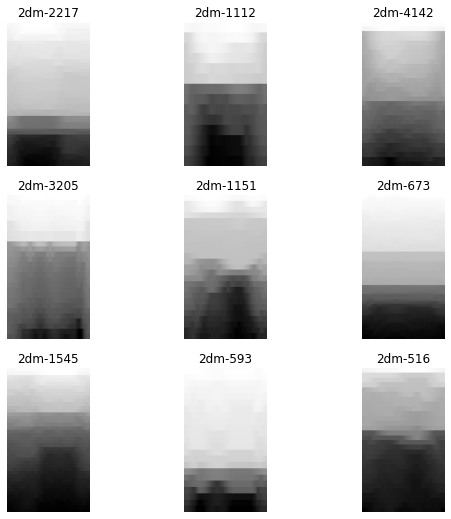

In [5]:
dls = DataBlock(
    blocks=(ImageBlock(cls=Tiff32Image), ImageBlock(cls=Tiff32Image), CategoryBlock), 
    get_items=get_image_files,
    n_inp=1,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    # item_tfms=[Resize(256)],
    get_y = [lambda x: x, lambda x: str(x).split('/')[-1][:-5]],
    batch_tfms=[IntToFloatTensor(div=2**16-1),],
        ).dataloaders(DATA_DIRECTORY/f"images/energies{THRESHOLD}", bs=32)

dls.show_batch()